Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7116 - loss: 0.7825 - val_accuracy: 0.8566 - val_loss: 0.3956
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8700 - loss: 0.3590 - val_accuracy: 0.8733 - val_loss: 0.3465
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.8896 - loss: 0.3033 - val_accuracy: 0.8841 - val_loss: 0.3158
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9015 - loss: 0.2667 - val_accuracy: 0.8967 - val_loss: 0.2813
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9131 - loss: 0.2363 - val_accuracy: 0.8990 - val_loss: 0.2838
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9229 - loss: 0.2114 - val_accuracy: 0.9096 - val_loss: 0.2562
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9252 - loss: 0.1983 - val_accuracy: 0.9026 - val_loss: 0.2696
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9305 - loss: 0.1852 - 

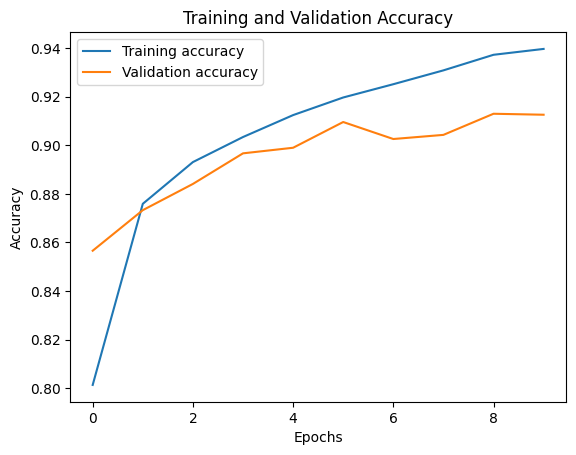

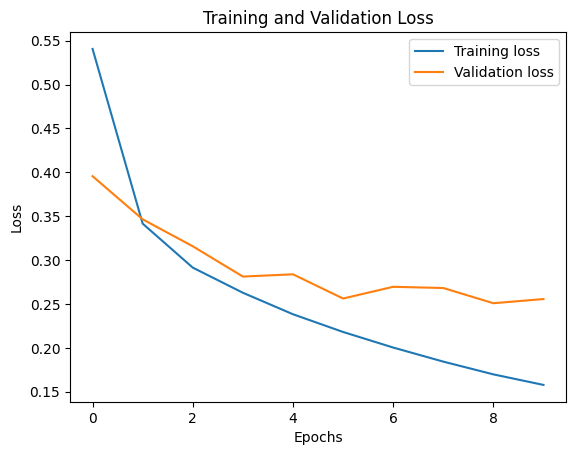

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Точність попередньої багатошарової мережі склала 0.8852 на відміну від згорткової точність якої була вищою і склала 0.9125.

Epoch 1/10


C:\Users\kybav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 432s 459ms/step - accuracy: 0.0979 - loss: 2.3420 - val_accuracy: 0.1007 - val_loss: 2.3028
Epoch 2/10
  1/937 ━━━━━━━━━━━━━━━━━━━━ 5:49 373ms/step - accuracy: 0.0625 - loss: 2.3022

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.0625 - loss: 2.3022 - val_accuracy: 0.1250 - val_loss: 2.3054
Epoch 3/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 696s 743ms/step - accuracy: 0.0986 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - accuracy: 0.1250 - loss: 2.3019 - val_accuracy: 0.0625 - val_loss: 2.3029
Epoch 5/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 218s 232ms/step - accuracy: 0.1006 - loss: 2.3027 - val_accuracy: 0.0998 - val_loss: 2.3026
Epoch 6/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 106us/step - accuracy: 0.0938 - loss: 2.3022 - val_accuracy: 0.1875 - val_loss: 2.3012
Epoch 7/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 211s 225ms/step - accuracy: 0.0977 - loss: 2.3028 - val_accuracy: 0.1039 - val_loss: 2.3030
Epoch 8/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 118us/step - accuracy: 0.0781 - loss: 2.3020 - val_accuracy: 0.0625 - val_loss: 2.3078
Epoch 9/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 248s 265ms/step - accuracy: 0.0976 - loss: 2.3030 - val

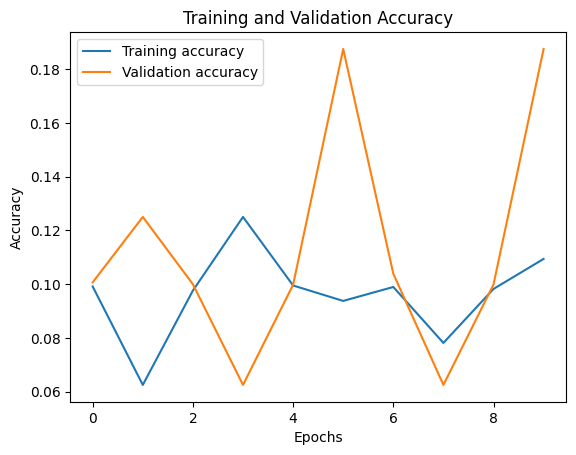

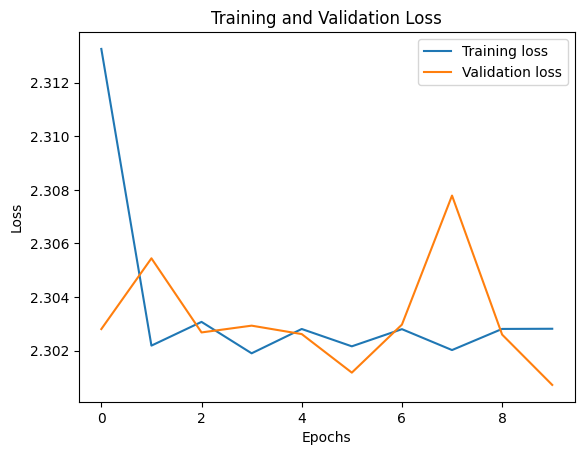

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import InputLayer


(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

train_images = np.stack((train_images,) * 3, axis=-1)  # Дублюємо канали
test_images = np.stack((test_images,) * 3, axis=-1)


train_images = np.resize(train_images, (train_images.shape[0], 32, 32, 3))
test_images = np.resize(test_images, (test_images.shape[0], 32, 32, 3))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)
validation_generator = test_datagen.flow(test_images, test_labels, batch_size=64)


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 64,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(test_images) // 64
)


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Якщо точність тестування моделі становить лише близько 10%, це вказує на те, що модель не навчилася правильно класифікувати дані. Це може бути спричинено кількома факторами.Розглянемо можливі причини та способи їх виправлення.

In [46]:

for layer in base_model.layers[-4:]:  
    layer.trainable = True


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 64,
    epochs=20,  
    validation_data=validation_generator,
    validation_steps=len(test_images) // 64
)


Epoch 1/20
373/937 ━━━━━━━━━━━━━━━━━━━━ 7:34 806ms/step - accuracy: 0.1009 - loss: 2.3066